In [1]:
pip install pandas numpy matplotlib seaborn scikit-learn


   ---------------------------------------- 0.0/8.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.7 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.7 MB ? eta -:--:--
   -- ------------------------------------- 0.5/8.7 MB 849.4 kB/s eta 0:00:10
   -- ------------------------------------- 0.5/8.7 MB 849.4 kB/s eta 0:00:10
   -- ------------------------------------- 0.5/8.7 MB 849.4 kB/s eta 0:00:10
   -- ------------------------------------- 0.5/8.7 MB 849.4 kB/s eta 0:00:10
   --- ------------------------------------ 0.8/8.7 MB 511.6 kB/s eta 0:00:16
   --- ------------------------------------ 0.8/8.7 MB 511.6 kB/s eta 0:00:16
   ---- ----------------------------------- 1.0/8.7 MB 540.5 kB/s eta 0:00:15
   ---- ----------------------------------- 1.0/8.7 MB 540.5 kB/s eta 0:00:15
   ---- ----------------------------------- 1.0/8.7 MB 540.5 kB/s eta 0:00:15
   ------ ------------

# Step 2 - Data Analysis and Preprocessing

In [26]:
#Imports & Load Data and Basic info

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Make plots look nice
sns.set(style="whitegrid")

# Load the dataset
df = pd.read_csv(r"D:\Horizon\Semester 6\Intelligent Systems\Weather Predictor\data\weather_classification_data.csv")

# Display first few rows
df.head()


,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy
2,30.0,64,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain,Sunny
3,38.0,83,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal,Sunny
4,27.0,74,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain,Rainy


In [27]:
# Shape of dataset (rows, columns)
print("Dataset shape:", df.shape)

# Column data types
print("\nData types:")
print(df.dtypes)

# Check missing values
print("\nMissing values per column:")
print(df.isnull().sum())


Dataset shape: (13200, 11)

Data types:
Temperature             float64
Humidity                  int64
Wind Speed              float64
Precipitation (%)       float64
Cloud Cover              object
Atmospheric Pressure    float64
UV Index                  int64
Season                   object
Visibility (km)         float64
Location                 object
Weather Type             object
dtype: object

Missing values per column:
Temperature             0
Humidity                0
Wind Speed              0
Precipitation (%)       0
Cloud Cover             0
Atmospheric Pressure    0
UV Index                0
Season                  0
Visibility (km)         0
Location                0
Weather Type            0
dtype: int64


Weather Type
Rainy     3300
Cloudy    3300
Sunny     3300
Snowy     3300
Name: count, dtype: int64

Class distribution (%):
Weather Type
Rainy     25.0
Cloudy    25.0
Sunny     25.0
Snowy     25.0
Name: proportion, dtype: float64


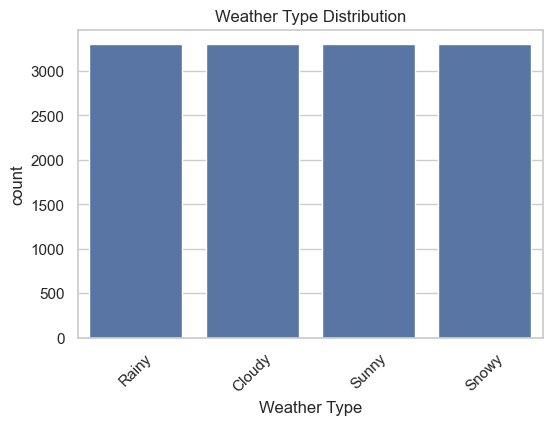

In [28]:
# Target column
target = "Weather Type"

# Class counts
print(df[target].value_counts())
print("\nClass distribution (%):")
print(df[target].value_counts(normalize=True) * 100)

# Plot
plt.figure(figsize=(6,4))
sns.countplot(x=target, data=df)
plt.title("Weather Type Distribution")
plt.xticks(rotation=45)
plt.show()


In [30]:
# Select numeric columns 
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

# Summary statistics
df[numeric_cols].describe()

,Temperature,Humidity,Wind Speed,Precipitation (%),Atmospheric Pressure,UV Index,Visibility (km)
count,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000
mean,19.127576,68.710833,9.832197,53.644394,1005.827896,4.005758,5.462917
std,17.386327,20.194248,6.908704,31.946541,37.199589,3.856600,3.371499
min,-25.000000,20.000000,0.000000,0.000000,800.120000,0.000000,0.000000
25%,4.000000,57.000000,5.000000,19.000000,994.800000,1.000000,3.000000
50%,21.000000,70.000000,9.000000,58.000000,1007.650000,3.000000,5.000000
75%,31.000000,84.000000,13.500000,82.000000,1016.772500,7.000000,7.500000
max,109.000000,109.000000,48.500000,109.000000,1199.210000,14.000000,20.000000


Visualizations

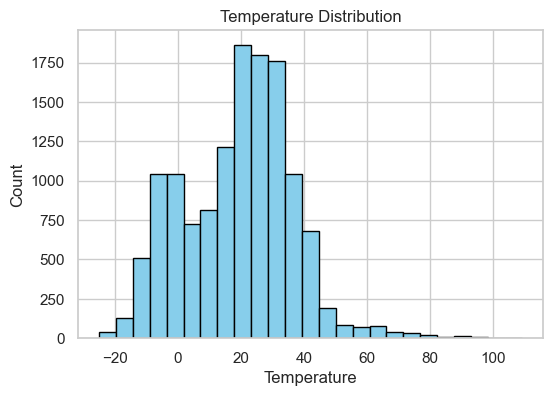

In [31]:
# 1. Histogram for Temperature
plt.figure(figsize=(6,4))
plt.hist(df['Temperature'], bins=25, color='skyblue', edgecolor='black')
plt.title("Temperature Distribution")
plt.xlabel("Temperature")
plt.ylabel("Count")
plt.show()

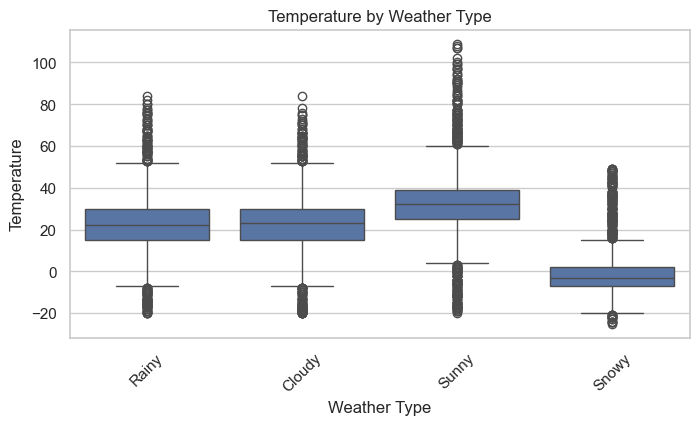

In [32]:
# 2. Boxplot: Temperature by Weather Type
plt.figure(figsize=(8,4))
sns.boxplot(x=target, y="Temperature", data=df)
plt.title("Temperature by Weather Type")
plt.xticks(rotation=45)
plt.show()

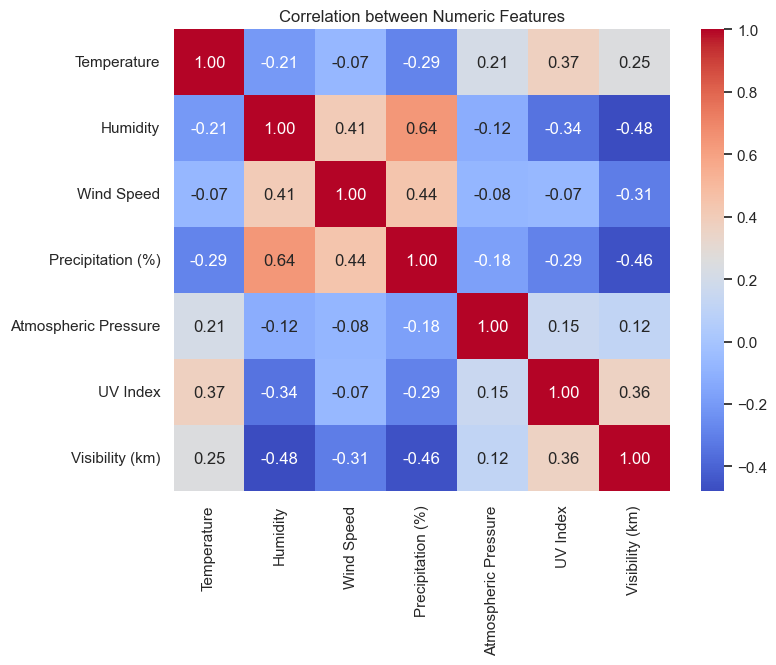

In [33]:
# 3. Correlation heatmap for numeric features
plt.figure(figsize=(8,6))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation between Numeric Features")
plt.show()

In [34]:
#Handling missing values

for col in df.columns:
    if df[col].isnull().sum() > 0:
        if df[col].dtype in ['int64', 'float64']:
            df[col].fillna(df[col].median(), inplace=True)
        else:
            df[col].fillna(df[col].mode()[0], inplace=True)

# Check again
print("Missing values after handling:")
print(df.isnull().sum())


Missing values after handling:
Temperature             0
Humidity                0
Wind Speed              0
Precipitation (%)       0
Cloud Cover             0
Atmospheric Pressure    0
UV Index                0
Season                  0
Visibility (km)         0
Location                0
Weather Type            0
dtype: int64


Feature Engineering

High_Precip: Can help the model distinguish between rainy/cloudy and sunny days.

Windy: High wind speed might be more common in certain weather types.

Temp_Humid: Hot + humid weather might relate to specific weather conditions.

In [35]:
# 1) High precipitation flag (1 if > 50%)
df['High_Precip'] = (df['Precipitation (%)'] > 50).astype(int)

# 2) Windy flag (1 if Wind Speed above median)
wind_median = df['Wind Speed'].median()
df['Windy'] = (df['Wind Speed'] > wind_median).astype(int)

# 3) Temperature-Humidity interaction
df['Temp_Humid'] = df['Temperature'] * df['Humidity']

# Check the new columns
df[['Precipitation (%)', 'High_Precip', 'Wind Speed', 'Windy', 'Temp_Humid']].head()


,Precipitation (%),High_Precip,Wind Speed,Windy,Temp_Humid
0,82.0,1,9.5,1,1022.0
1,71.0,1,8.5,0,3744.0
2,16.0,0,7.0,0,1920.0
3,82.0,1,1.5,0,3154.0
4,66.0,1,17.0,1,1998.0


Encoding categorical variables (Cloud Cover, Season, Location, Weather Type)

In [36]:
from sklearn.preprocessing import LabelEncoder

# 1) Encode target
target = "Weather Type"
le = LabelEncoder()
y = le.fit_transform(df[target])  # Convert target to numeric labels

# 2) One-hot encode categorical features (excluding the target)
categorical_cols = ['Cloud Cover', 'Season', 'Location']
X = pd.get_dummies(df.drop(columns=[target]), columns=categorical_cols, drop_first=True)

# Check result
print("Encoded features shape:", X.shape)
X.head()


Encoded features shape: (13200, 18)


,Temperature,Humidity,Wind Speed,Precipitation (%),Atmospheric Pressure,UV Index,Visibility (km),High_Precip,Windy,Temp_Humid,Cloud Cover_cloudy,Cloud Cover_overcast,Cloud Cover_partly cloudy,Season_Spring,Season_Summer,Season_Winter,Location_inland,Location_mountain
0,14.0,73,9.5,82.0,1010.82,2,3.5,1,1,1022.0,False,False,True,False,False,True,True,False
1,39.0,96,8.5,71.0,1011.43,7,10.0,1,0,3744.0,False,False,True,True,False,False,True,False
2,30.0,64,7.0,16.0,1018.72,5,5.5,0,0,1920.0,False,False,False,True,False,False,False,True
3,38.0,83,1.5,82.0,1026.25,7,1.0,1,0,3154.0,False,False,False,True,False,False,False,False
4,27.0,74,17.0,66.0,990.67,1,2.5,1,1,1998.0,False,True,False,False,False,True,False,True


Train/Test Split

In [37]:
from sklearn.model_selection import train_test_split

# Split into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape :", X_test.shape)


X_train shape: (10560, 18)
X_test shape : (2640, 18)


# Step 3: Model Training

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import pickle

# Prepare features and target
X = df.drop("Weather Type", axis=1)
y = df["Weather Type"]

# One-hot encode features
X_encoded = pd.get_dummies(X)

# Save training columns for prediction
train_columns = X_encoded.columns.tolist()
pickle.dump(train_columns, open("../train_columns.pkl", "wb"))  # saved in project root

In [39]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

In [40]:
# Train Logistic Regression

log_reg_model = LogisticRegression(max_iter=1000, random_state=42)
log_reg_model.fit(X_train, y_train)
y_pred_lr = log_reg_model.predict(X_test)
acc_lr = accuracy_score(y_test, y_pred_lr)
print(f"Logistic Regression Accuracy: {acc_lr:.2f}")

Logistic Regression Accuracy: 0.88


d:\Anaconda\envs\aif_env\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [41]:
# Train Random Forest

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
acc_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {acc_rf:.2f}")

Random Forest Accuracy: 0.91


In [42]:
# Select Best Model

if acc_rf >= acc_lr:
    best_model = rf_model
    print("Random Forest selected as best model")
else:
    best_model = log_reg_model
    print("Logistic Regression selected as best model")

Random Forest selected as best model


In [43]:
# Save all models

pickle.dump(log_reg_model, open("../log_reg_model.pkl", "wb"))
pickle.dump(rf_model, open("../rf_model.pkl", "wb"))
pickle.dump(best_model, open("../model.pkl", "wb"))

print("Models saved: model.pkl (Best Model), log_reg_model.pkl, rf_model.pkl")
print("Training columns saved: train_columns.pkl")

Models saved: model.pkl (Best Model), log_reg_model.pkl, rf_model.pkl
Training columns saved: train_columns.pkl
